## Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading data from csv

In [3]:
# load the csv file and create a pandas dataframe called 'cars' using the same
data = pd.read_csv("./car data.csv")
cars = pd.DataFrame(data)
# display the first five rows of the dataframe
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# display number of rows and columns
cars.shape

(301, 9)

In [5]:
# getting information about the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking missing values
cars.isnull().sum()
# there are no missing values in this dataframe, failing which, we would have needed to imputate our own data 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking distribution of data for 3 columns
print(cars['Fuel_Type'].value_counts(),"\n",cars['Seller_Type'].value_counts(),"\n",cars['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 
 Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 
 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Encoding the categorical data

In [8]:
#replacing the Fuel_Type with integer values
cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#replacing the Seller_Type with integer values
cars.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#replacing the Transmission with integer values
cars.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


## Splitting of data into training and test data

In [9]:
# removing selling_price and car_name columns and storing them in different variables
car_names = cars['Car_Name']
y = cars['Selling_Price']
x = cars.drop(['Car_Name','Selling_Price'],axis=1)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=3)

In [11]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,2018,9.83,2071,1,0,1,0
101,2017,1.82,1400,0,1,1,0
115,2015,1.47,17500,0,1,1,0
38,2016,3.76,10079,0,0,1,0
245,2012,9.40,71000,1,0,1,0


In [12]:
Y_train.head()

5      9.25
101    1.70
115    1.11
38     3.00
245    5.20
Name: Selling_Price, dtype: float64

## Training the Linear Regression Model from ScikitLearn

In [13]:
# creating an object of the model called 'lin_reg'
lin_reg = LinearRegression()

In [14]:
# training the model
lin_reg.fit(X_train,Y_train)

LinearRegression()

## Model evaluation

In [15]:
# prediction on training data
training_data_pred = lin_reg.predict(X_train)

In [16]:
#error calculation
error= metrics.r2_score(Y_train,training_data_pred)
print("error is",error)

error is 0.8849815853900544


## Plotting to visualise the price difference

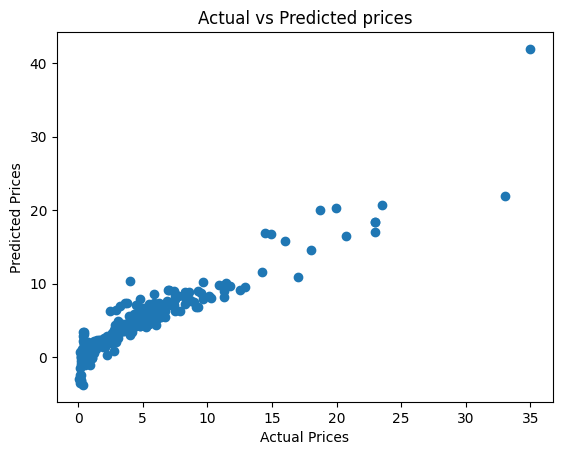

In [17]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [18]:
#predicting on test data
test_data_pred= lin_reg.predict(X_test)

In [19]:
# error calculation for test data
error_test = metrics.r2_score(Y_test,test_data_pred)
print("error is: ",error_test)

error is:  0.7979072218427177


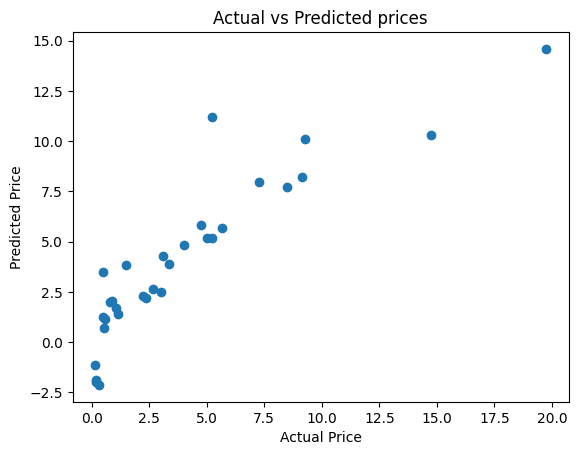

In [21]:
# Plotting the graph to see how close the values are
plt.scatter(Y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted prices")
plt.show()